In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Classifying wheat into 1 of 3 varieties. 

In [2]:
df = pd.read_csv("seeds_dataset.txt", sep='\\t', engine='python')
df.columns = ['a', 'p', 'compactness', 'length', 'width', 'coeff', 'length_g', 'type']   # we have to define the columns
print(f'Our data has {df.shape[0]} rows and {df.shape[1]} columns')
df.head()

Our data has 209 rows and 8 columns


,a,p,compactness,length,width,coeff,length_g,type
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


The classification column is type

In [3]:

df['type'].value_counts()

type
2    70
3    70
1    69
Name: count, dtype: int64

70% of the data is separated for training, the rest is used as test data. The classification colunm is type, while the other columns represent different attributes of wheat. 

In [4]:
features = df[['a', 'p', 'compactness', 'length', 'width', 'coeff', 'length_g']]
target_class = df['type']
features = np.ascontiguousarray(features)
target_class = np.ascontiguousarray(target_class)

X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target_class, 
                                                    test_size=.3, 
                                                    random_state=13579)

KNN is set to 3

In [5]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [6]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
print (f'The model accuracy is {accuracy_score(prediction, y_test):0.4%}')

The model accuracy is 88.8889%


k=  3 Accuracy= 88.8889%
k=  5 Accuracy= 88.8889%
k=  7 Accuracy= 92.0635%
k=  9 Accuracy= 92.0635%
k= 11 Accuracy= 93.6508%
k= 13 Accuracy= 93.6508%
k= 15 Accuracy= 92.0635%
k= 17 Accuracy= 92.0635%
k= 19 Accuracy= 92.0635%
k= 21 Accuracy= 90.4762%
k= 23 Accuracy= 90.4762%
k= 25 Accuracy= 93.6508%
k= 27 Accuracy= 93.6508%
k= 29 Accuracy= 93.6508%
k= 31 Accuracy= 93.6508%
k= 33 Accuracy= 93.6508%
k= 35 Accuracy= 93.6508%
k= 37 Accuracy= 93.6508%
k= 39 Accuracy= 93.6508%
k= 41 Accuracy= 95.2381%
k= 43 Accuracy= 93.6508%
k= 45 Accuracy= 93.6508%
k= 47 Accuracy= 93.6508%
k= 49 Accuracy= 95.2381%
k= 51 Accuracy= 95.2381%
k= 53 Accuracy= 95.2381%
k= 55 Accuracy= 95.2381%
k= 57 Accuracy= 95.2381%
k= 59 Accuracy= 95.2381%
k= 61 Accuracy= 95.2381%
k= 63 Accuracy= 95.2381%
k= 65 Accuracy= 95.2381%
k= 67 Accuracy= 95.2381%
k= 69 Accuracy= 96.8254%
k= 71 Accuracy= 93.6508%
k= 73 Accuracy= 93.6508%
k= 75 Accuracy= 92.0635%
k= 77 Accuracy= 93.6508%
k= 79 Accuracy= 93.6508%
k= 81 Accuracy= 93.6508%


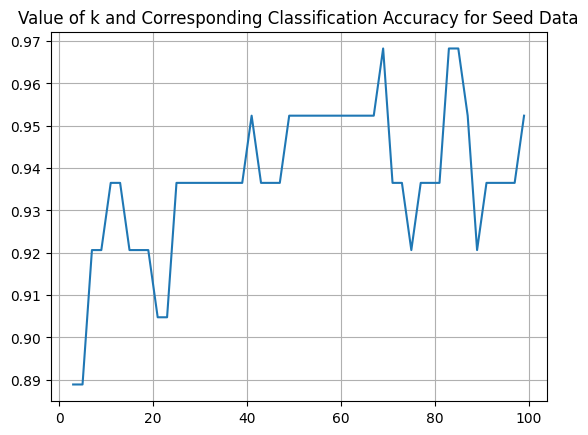

In [7]:
results = []

for k in range(3, 101, 2):   
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    accuracy = accuracy_score(prediction, y_test)
    print (f'k= {k:2} Accuracy= {accuracy:2.4%}')
    
    results.append([k, accuracy])

results = pd.DataFrame(results, columns=["k", "accuracy"])

plt.plot(results.k, results.accuracy)
plt.title("Value of k and Corresponding Classification Accuracy for Seed Data")
plt.grid()
plt.show()